In [1]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

https://www.kaggle.com/cms/hospital-general-information

We often find ourselves setting up a doctor's appointment and forgetting about it. But how often does that happen? And would it be possible to predict whether or not a person would show up to their appointment based on 300k medical appointments and its 15 variables (characteristics.)

Let us start by looking at the data for the medical appointments.

In [2]:
medical = Table.read_table('KaggleV2-May-2016.csv')
medical.show(10)

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
2.98725e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.58998e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.26296e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.67951e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.84119e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
9.59851e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
7.33688e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
3.44983e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
5.63947e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
7.81246e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Does having had receieved an SMS associated with showing up to an appointment?

Null Hypothesis: The patient has an equal chance of showing up to an appointment regardless of whether or not the patient received an SMS.

Alternative Hypothesis: The patient has a higher chance of showing up to an appointment if they had recieved an SMS.

What if we tried to first split up the table into two tables with one table being those who received an SMS and one table for those who did not receive an SMS? We would then bootstrap each of these datasets separately and take the difference of their corresponding elements in the test statistics we will generate in each of the bootstraps.

In [25]:
def bootstrap_individual(tbl):
    array_of_bs_means = make_array()
    for i in range(5000):
        sampled = x.sample()
        prop_of_yes = (np.count_nonzero(sampled.column('No-show') == "Yes"))/ sampled.num_rows
        array_of_bs_means = np.append(array_of_bs_means, prop_of_yes)
    return array_of_bs_means

In [26]:
x = medical.where('SMS_received', 1)
x

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
7.54295e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
9.99484e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No
1.71354e+13,5621836,F,2016-04-26T10:54:18Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
8.6323e+14,5616091,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
5.81937e+12,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No
7.65352e+12,5616921,F,2016-04-25T15:01:04Z,2016-04-29T00:00:00Z,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,No
5.87332e+12,5609446,M,2016-04-20T15:54:18Z,2016-04-29T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No
1.37944e+11,5615608,M,2016-04-25T12:44:36Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,1,0,1,0,1,No
8.54542e+12,5618643,F,2016-04-26T07:19:49Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes
9.22356e+13,5534656,F,2016-03-31T17:11:17Z,2016-04-29T00:00:00Z,27,GRANDE VITÓRIA,0,0,0,0,0,1,Yes


In [27]:
y = medical.where('SMS_received',0)
y

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
2.98725e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.58998e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.26296e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.67951e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.84119e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
9.59851e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
7.33688e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
3.44983e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
5.63947e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
7.81246e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


The following calculations are under the assumption that the hospital we have selected and the patients that made an appointment with this hospital is a large and random sample of all patients in the United States. We are trying to see if sending an SMS actually changes whether a person goes to an appointment or not of all patients in the United States.

In [28]:
bootstrap_of_x = bootstrap_individual(x)
bootstrap_of_x

array([0.27444902, 0.27577363, 0.27289893, ..., 0.27611183, 0.27777465,
       0.27509723])

In [29]:
bootstrap_of_y = bootstrap_individual(y)
bootstrap_of_y

array([0.27478722, 0.27461812, 0.27529452, ..., 0.27681641, 0.27955019,
       0.27619638])

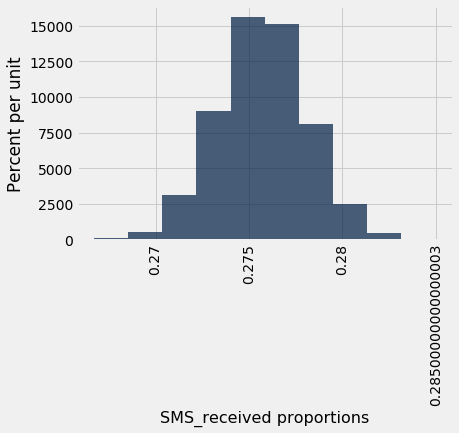

In [30]:
table_x = Table().with_column('SMS_received proportions', bootstrap_of_x).hist('SMS_received proportions')
table_x

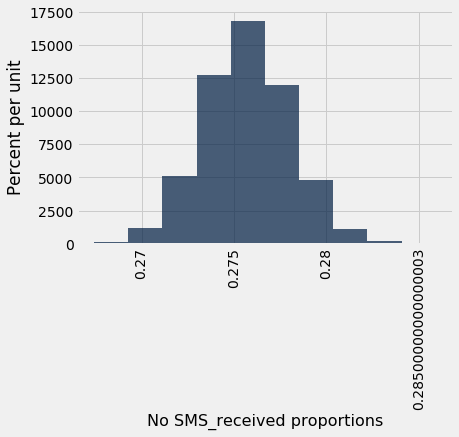

In [31]:
table_y = Table().with_column('No SMS_received proportions', bootstrap_of_y).hist("No SMS_received proportions")
table_y

In [32]:
difference_prop_x_y = bootstrap_of_x - bootstrap_of_y
difference_prop_x_y

array([-0.0003382 ,  0.00115552, -0.00239558, ..., -0.00070458,
       -0.00177555, -0.00109915])

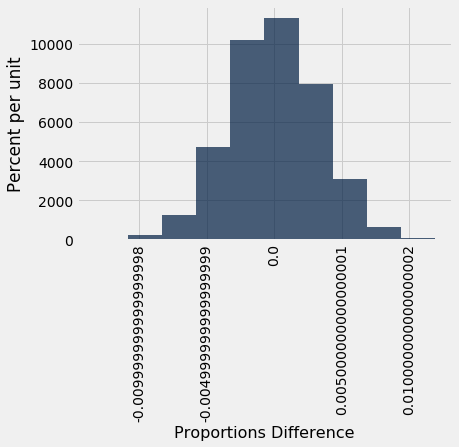

In [33]:
table_difference_prop_x_y = Table().with_column('Proportions Difference', difference_prop_x_y).hist('Proportions Difference')
table_difference_prop_x_y

While this does seem like the proportion difference between the proportion of those who showed up to their appointment who recieved an SMS and the proportion of those who showed up to their appointment who did not recieve an SMS is 0. The problem with the method of bootstrapping is that the sample sizes are different, therefore we will have to try bootstrapping some other way. 

For the following method, we will not split up the table, but we will bootstrap using the original table and create an array of proportion differences in each bootstrap resample. 

In [46]:
def bootstrap_together(tbl):
    array_of_diff_prop = make_array()
    for i in range(1000):
        sampled = tbl.sample()
        yes_SMS = sampled.where('SMS_received', 1)
        no_SMS = sampled.where('SMS_received', 0)
        yes_SMS_prop_of_yes = (np.count_nonzero(yes_SMS.column('No-show') == "Yes"))/ yes_SMS.num_rows
        no_SMS_prop_of_yes = (np.count_nonzero(no_SMS.column('No-show') == "Yes"))/ no_SMS.num_rows
        diff_prop = yes_SMS_prop_of_yes - no_SMS_prop_of_yes
        array_of_diff_prop = np.append(array_of_diff_prop, diff_prop)
    return array_of_diff_prop

In [47]:
bootstrap_of_diff_prop = bootstrap_together(medical)
bootstrap_of_diff_prop

array([0.11409437, 0.10694349, 0.11040901, 0.10943346, 0.10875654,
       0.1090331 , 0.10686473, 0.11083471, 0.10385233, 0.10654204,
       0.11200085, 0.10923015, 0.1082407 , 0.10242366, 0.10944004,
       0.11160974, 0.1088555 , 0.10990756, 0.10763853, 0.11094136,
       0.10983423, 0.11199545, 0.10494108, 0.11105672, 0.10158967,
       0.10913685, 0.10684476, 0.10744303, 0.10906998, 0.10667959,
       0.11466545, 0.11098125, 0.11127535, 0.10641191, 0.11203434,
       0.10885397, 0.11518468, 0.10520425, 0.10875759, 0.10993609,
       0.1108199 , 0.10955879, 0.10824476, 0.11480704, 0.11105434,
       0.1082998 , 0.10657929, 0.11238027, 0.10891929, 0.10824453,
       0.11044677, 0.10339453, 0.10745561, 0.11085922, 0.1085598 ,
       0.11135293, 0.10734338, 0.10953867, 0.10969743, 0.10550609,
       0.104448  , 0.10528876, 0.1060258 , 0.10987623, 0.10695313,
       0.10579266, 0.11295389, 0.10536849, 0.10870151, 0.10793136,
       0.10685938, 0.1101024 , 0.10761056, 0.11804491, 0.11022

In [48]:
lower = percentile(2.5, bootstrap_of_diff_prop)
higher = percentile(97.5, bootstrap_of_diff_prop)
[lower,higher]

[0.10348746066391296, 0.11443675995517899]

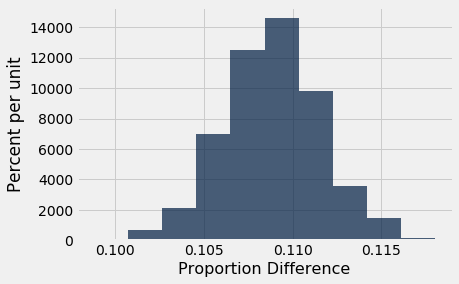

In [49]:
table_diff_prop = Table().with_column('Proportion Difference', bootstrap_of_diff_prop).hist('Proportion Difference')
table_diff_prop

If 0 is in our confidence interval of 95% we do not have enough to reject the null. If 0 is not in our interval, then we can reject the null hypothesis with a P-value cutoff of 5%. Since 0 is not in our 95% confidence interval, we reject the null hypothesis that the patient has an equal chance of showing up the appointment regardless of whether or not they recieved an SMS because we have just shown that there IS a difference. 

In [3]:
medical

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
2.98725e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.58998e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.26296e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.67951e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.84119e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
9.59851e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
7.33688e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
3.44983e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
5.63947e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
7.81246e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [12]:
colors = make_array()
for i in range(medical.num_rows):
    if medical.column('No-show').item(i) == 'No':
        colors = np.append(colors,'gold')
    else:
        colors = np.append(colors, 'blue')


In [23]:
medical = medical.with_column('Color', colors)
medical

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Color
2.98725e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,gold
5.58998e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,gold
4.26296e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,gold
8.67951e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,gold
8.84119e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,gold
9.59851e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,gold
7.33688e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,blue
3.44983e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,blue
5.63947e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,gold
7.81246e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,gold


In [19]:
hours = make_array()
for i in medical.column('ScheduledDay'):
    x = int(i[11:13])
    hours = np.append(hours, x)
hours

array([18., 16., 16., ..., 16., 15., 13.])

In [24]:
medical = medical.with_column("Hour_of_Schedule", hours)
medical

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Color,Hour_of_Schedule
2.98725e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,gold,18
5.58998e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,gold,16
4.26296e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,gold,16
8.67951e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,gold,17
8.84119e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,gold,16
9.59851e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,gold,8
7.33688e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,blue,15
3.44983e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,blue,15
5.63947e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,gold,8
7.81246e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,gold,12


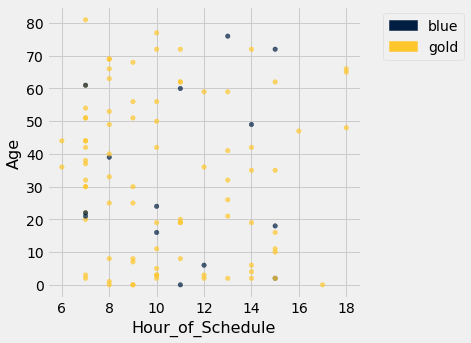

In [55]:
medical.sample(100).scatter('Hour_of_Schedule', 'Age', colors='Color')

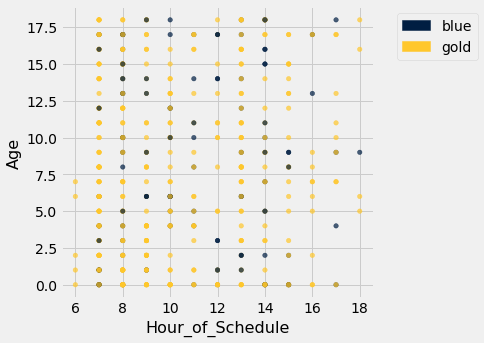

In [67]:
medical.where('Age', are.below_or_equal_to(18)).sample(500).scatter('Hour_of_Schedule', 'Age', colors='Color')

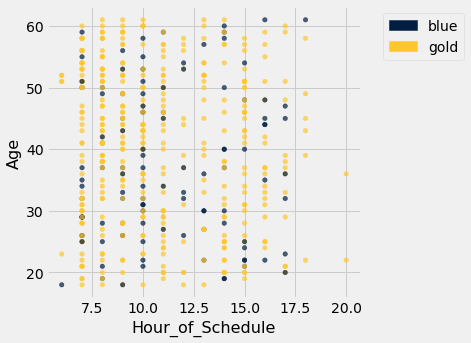

In [68]:
medical.where('Age', are.between(18, 62)).sample(500).scatter('Hour_of_Schedule', 'Age', colors='Color')

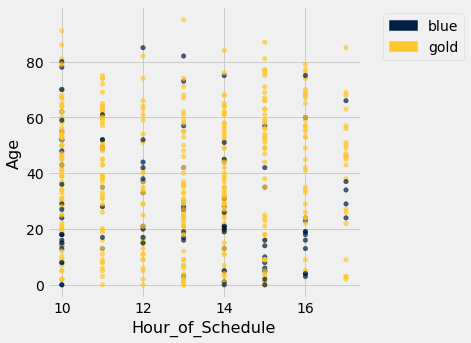

In [74]:
medical.where('Hour_of_Schedule', are.between(10, 18)).sample(500).scatter('Hour_of_Schedule', 'Age', colors='Color')

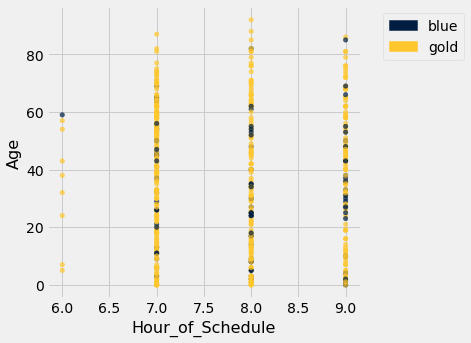

In [77]:
medical.where('Hour_of_Schedule', are.below(10)).sample(500).scatter('Hour_of_Schedule', 'Age', colors='Color')

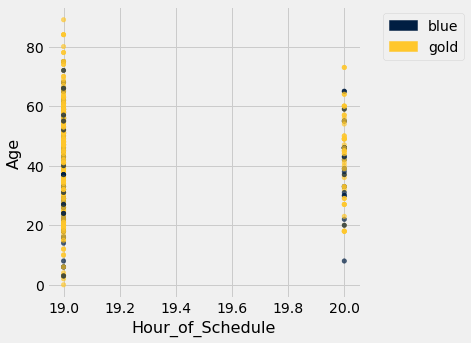

In [78]:
medical.where('Hour_of_Schedule', are.above(18)).sample(500).scatter('Hour_of_Schedule', 'Age', colors='Color')

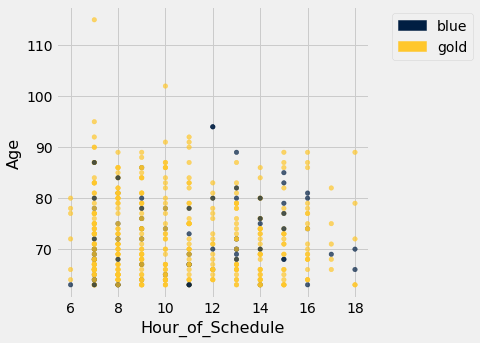

In [69]:
medical.where('Age', are.above(62)).sample(500).scatter('Hour_of_Schedule', 'Age', colors='Color')

In [87]:
prop_for_hours = make_array()
for i in range(6,22):
    prop_for_hours = np.append(prop_for_hours, np.count_nonzero(medical.where('Hour_of_Schedule', i).column('No-show') == 'Yes')/medical.where('Hour_of_Schedule', i).num_rows) 
prop_for_hours

array([0.19201521, 0.151512  , 0.18268291, 0.19698978, 0.22069465,
       0.22784212, 0.2036149 , 0.20927402, 0.22679961, 0.23183562,
       0.23763984, 0.24819526, 0.21268657, 0.23360656, 0.3       ,
       0.33333333])

In [91]:
x = Table().with_column("Hour", np.arange(6,22), "Proportion", prop_for_hours)
x.show(16)

Hour,Proportion
6,0.192015
7,0.151512
8,0.182683
9,0.19699
10,0.220695
11,0.227842
12,0.203615
13,0.209274
14,0.2268
15,0.231836


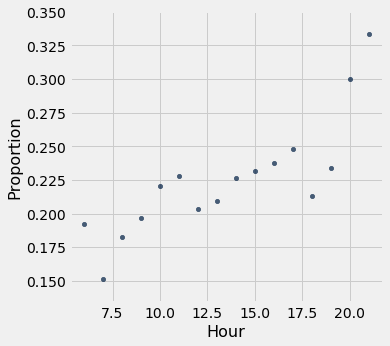

In [92]:
x.scatter('Hour', 'Proportion')